# Harmony Search

let $\mathbb{X}^{t} = \left\lbrace \mathbf{x}_1^{t},\ldots,\mathbf{x}_n^{t} \right\rbrace$ the population at time $t$, $f: \mathbb{X} \rightarrow \mathbb{R}$ the objective function, $g_i(\mathbf{x}) \leq 0$ for $i=1,2,\ldots,m_1$ the soft restrictions and $h_i(\mathbf{x}) = 0$ for $i=1,2,\ldots,m_2$ the hard restrictions of an optimization problem.. Set $\text{hcmr} \sim U\left[0, 1\right]$ and $\text{par} \sim U\left[0, 1\right]$ where $U[0,1]$ is distributed uniformly. Set $\alpha \in [0, 1]$

1. Get $w^{t}$ the worst harmony as: $\text{arg} \max_{x\in \mathbb{X}} f(x)$.

2. Set $I_1, I_2 \sim U[0,1]$ random numbers between 0 and 1.

3. <br>
&emsp; <b>IF</b> $I_1 \leq \text{hcmr}$ <b>THEN</b>: <br>
    &emsp;&emsp; $v_{i}^{t + 1} = U(\mathbb{X}_i^{t})$ where $U(\mathbb{X}_i^{t})$ is a uniform distributed random variable over the set of $i$-th variables from the population set $\mathbb{X}^{t + 1}$. <br>
    &emsp;&emsp; <b>IF</b> $I_2 \leq \text{par}$ <b>THEN</b>: <br>
        &emsp;&emsp;&emsp; $x_{i}^{t+1} = v_{i}^{t+1} + \alpha \cdot U[-1, 1]$ where $U[-1, 1]$ is a random variable between -1 and 1. <br>
    &emsp;&emsp; <b>ELSE</b>: <br>
        &emsp;&emsp;&emsp; $x_{i}^{t+1} = v_{i}^{t+1}$ <br>
    &emsp;&emsp; <b>ENDIF</b> <br>
&emsp; <b>ELSE</b>: <br>
    &emsp;&emsp; $x_{i}^{t+1} = U([x_i^{sup}, x_{i}^{inf}])$ where $U([x_i^{sup}, x_{i}^{inf}])$ is a random variable between the $x_{i}$ variable range. <br>
&emsp; <b>ENDIF</b> <br><br>
    
4. Select the worst harmony $w^{t}$ based on a greedy selection.
    
5. Select best harmony between $w^{t}$ and $x^{t+1}$ using DEB conditions. **If** $w^{t}$ is the best **then** $\mathbb{X}^{t+1} = \mathbb{X}^{t}$ **else** $\mathbb{X}^{t+1} = \left(\mathbb{X}^{t}\cup \left\lbrace x^{t+1} \right\rbrace\right) - \left\lbrace w^{t} \right\rbrace$.



In [1]:
from IPython.display import display_markdown
from pyIpnHeuristic.benchmark import get_pg06

problem_parameters = get_pg06()

objective_function = problem_parameters.get("objective_function")
g = problem_parameters.get("gx")
h = problem_parameters.get("hx")
ranges = problem_parameters.get("ranges")
markdown = problem_parameters.get("markdown")
x_best = problem_parameters.get("x")
fx_best = problem_parameters.get("fx")

display_markdown(markdown, raw=True)

## Problem G06:
Minimize: 
$$f(\mathbf{x}) = (x_1 - 10)^3 + (x_2 - 20)^3$$
subject to:
$$g_1(\mathbf{x}) = -(x_1-5)^2 - (x_2-5)^2 + 100 \leq 0 $$
$$g_2(\mathbf{x}) = (x_1-6)^2 + (x_2-5)^2 - 82.81 \leq 0 $$
where: $13 \leq x_1 \leq 100$, $0 \leq x_2 \leq 100$

## Initialize Harmony

In [2]:
from pyIpnHeuristic.harmonySearch import HarmonySearch

population_size = 5

harmonySearch = HarmonySearch(
    objective_function,
    soft_constrains=g,
    hard_constrains=h,
    ranges=ranges,
    population_size=population_size,
    smooth=False,
    epsilon=10**-4,
    hcmr=0.50,
    par=0.50,
    alpha=10**-3
)

harmonySearch.search(iterations=200000, save_history=True)

## Results

In [3]:
import pandas as pd
import numpy as np

pd.DataFrame(
    sorted([{**hist, 
             "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
             "fxi - Fx": hist["fx"] - fx_best} 
            for hist in harmonySearch.history], key=lambda x: x["iteration"], reverse=True)
)

,x,fx,gx,hx,iteration,||xi-X||,fxi - Fx
0,"[14.095014410903511, 0.842992204105784]",-6961.778564,0.000000,0,200000,0.000035,0.035312
1,"[14.095014410903511, 0.842992204105784]",-6961.778564,0.000000,0,199999,0.000035,0.035312
2,"[14.095014410903511, 0.842992204105784]",-6961.778564,0.000000,0,199998,0.000035,0.035312
3,"[14.095014410903511, 0.842992204105784]",-6961.778564,0.000000,0,199997,0.000035,0.035312
4,"[14.095014410903511, 0.842992204105784]",-6961.778564,0.000000,0,199996,0.000035,0.035312
...,...,...,...,...,...,...,...
199995,"[20.199700118605783, 10.672087074844116]",249.493078,150.994055,0,5,11.570613,7211.306953
199996,"[20.199700118605783, 10.672087074844116]",249.493078,150.994055,0,4,11.570613,7211.306953
199997,"[20.199700118605783, 10.672087074844116]",249.493078,150.994055,0,3,11.570613,7211.306953
199998,"[20.199700118605783, 10.672087074844116]",249.493078,150.994055,0,2,11.570613,7211.306953


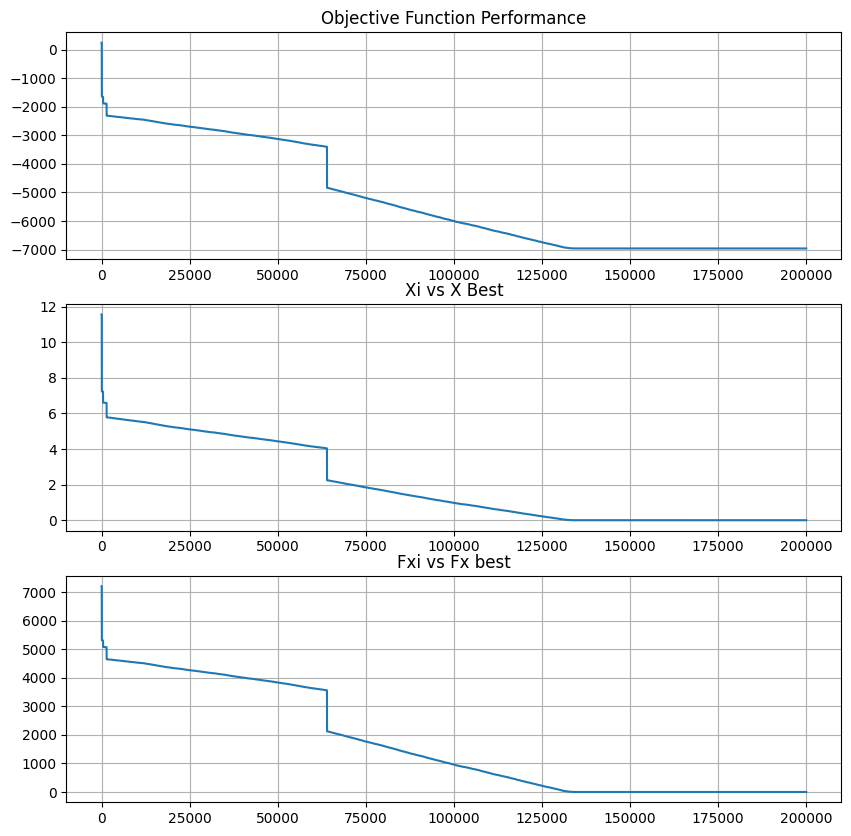

In [4]:
from _display import display_performance_results

rich_history = [{**hist, "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
  "fxi - Fx": hist["fx"] - fx_best} for hist in harmonySearch.history]
display_performance_results(rich_history)